In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# cd to the Object directory
%cd '/content/gdrive/MyDrive/Radiator'

/content/gdrive/MyDrive/Radiator


In [3]:
# clone the TensorFlow Model Garden repository
!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [4]:
!apt-get install protobuf-compiler python-lxml python-pil

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,615 kB of archives.
After this operation, 8,916 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4

In [5]:
!pip install Cython pandas tf-slim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 352 kB 4.6 MB/s 


In [6]:
!pip install lvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
%cd '/content/gdrive/MyDrive/Radiator/models/research/'
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/MyDrive/Radiator/models/research


In [8]:
import os
import sys
os.environ['PYTHONPATH']+=":/content/gdrive/MyDrive/Radiator/models"
sys.path.append("/content/gdrive/MyDrive/Radiator/models/research")

In [9]:
cp object_detection/packages/tf2/setup.py .

In [10]:
!python setup.py build

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/grid_anchor_generator_pb2.py -> build/lib

In [11]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/datasets
copying build/lib/datasets/cifar10.py -> build/bdist.linux-x86_64/egg/datasets
copying build/lib/datasets/__init__.py -> build/bdist.linux-x86_64/egg/datasets
copying build/lib/datasets/download_and_convert_visualwakewords.py -> build/bdist.linux-x86_64/egg/datasets
copying build/lib/datasets/preprocess_imagenet_validation_data.py -> build/bdist.linux-x86_64/egg/datasets
copying build/lib/datasets/flowers.py -> build/bdist.linux-x86_64/egg/datasets
copying 

In [12]:
%cd '/content/gdrive/MyDrive/Radiator/models/research/object_detection/builders/'

/content/gdrive/MyDrive/Radiator/models/research/object_detection/builders


In [13]:
!python model_builder_tf2_test.py

2022-07-20 10:22:22.948735: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0720 10:22:24.021934 140689827157888 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.56s
I0720 10:22:24.524215 140689827157888 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.56s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.14s
I0720 10:22:25.662815 140689827157888 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_cr

In [14]:
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
PATH_TO_SAVED_MODEL="/content/gdrive/MyDrive/Radiator/workspace1/exported-models/my_model/saved_model"
print('Loading model...', end='')
# load the saved model and build the detection function
detect_function=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Model Loaded!')

Loading model...Model Loaded!


In [15]:
category_index=label_map_util.create_category_index_from_labelmap("/content/gdrive/MyDrive/Radiator/workspace1/annotations/labels-map.pbtxt",use_display_name=True)

In [18]:
img = ['/content/gdrive/MyDrive/Radiator/workspace1/test_images/1.jpg',
       '/content/gdrive/MyDrive/Radiator/workspace1/test_images/2.jpg']

Running inference for /content/gdrive/MyDrive/Radiator/workspace1/test_images/1.jpg... Done


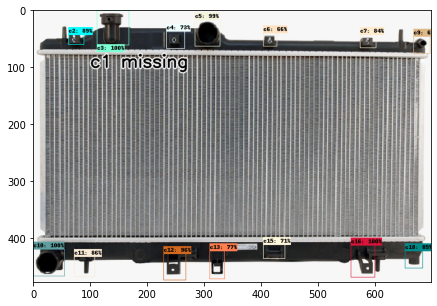

Running inference for /content/gdrive/MyDrive/Radiator/workspace1/test_images/2.jpg... Done


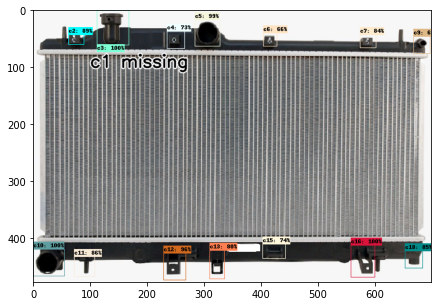

In [34]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import cv2

def load_image_into_numpy_array(path):
  return np.array(Image.open(path))
    
for image_path in img:
  print('Running inference for {}... '.format(image_path), end='')
  image_np=load_image_into_numpy_array(image_path)
  input_tensor=tf.convert_to_tensor(image_np)
  input_tensor=input_tensor[tf.newaxis, ...]

  detections=detect_function(input_tensor)
  num_detections=int(detections.pop('num_detections'))
  detections={key:value[0,:num_detections].numpy() for key,value in detections.items()}
  detections['num_detections']=num_detections
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  image_np_with_detections=image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=18,
      min_score_thresh=.6,
      line_thickness=1,
      keypoint_edges=1,
      agnostic_mode=False)
  
  %matplotlib inline
  cv2.putText(image_np_with_detections,"c1 missing",(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(255, 255, 255),6,cv2.LINE_AA)
  cv2.putText(image_np_with_detections,"c1 missing",(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0, 0, 0),2,cv2.LINE_AA)
  
  plt.figure(figsize=(10, 5))
  plt.imshow(image_np_with_detections)
  print('Done')
  plt.show()

In [ ]:
import pandas as pd
data = pd.DataFrame(category_index)
df1 = data.drop('id')
df = df1.T.values.tolist()

for id in range(len(df)):
  print(df[id])

['c1']
['c2']
['c3']
['c4']
['c5']
['c6']
['c7']
['c8']
['c9']
['c10']
['c11']
['c12']
['c13']
['c14']
['c15']
['c16']
['c17']
['c18']
